# **Exploratory Data Analytics (EDA)**

## **`Step 1: Imports`**

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [60]:
companies = pd.read_csv('Muhaddesa Noori - Unicorn_Companies.csv')


In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [58]:
drive.flush_and_unmount()


## **Step 2: Data Exploration**

In [61]:
companies.head(10)

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors
0,Bytedance,$180B,4/7/17,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,12/1/12,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100B,7/3/18,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95B,1/23/14,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$46B,12/12/11,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."
5,Canva,$40B,1/8/18,Internet software & services,Surry Hills,Australia,Oceania,2012,$572M,"Sequoia Capital China, Blackbird Ventures, Mat..."
6,Checkout.com,$40B,5/2/19,Fintech,London,United Kingdom,Europe,2012,$2B,"Tiger Global Management, Insight Partners, DST..."
7,Instacart,$39B,12/30/14,"Supply chain, logistics, & delivery",San Francisco,United States,North America,2012,$3B,"Khosla Ventures, Kleiner Perkins Caufield & By..."
8,JUUL Labs,$38B,12/20/17,Consumer & retail,San Francisco,United States,North America,2015,$14B,Tiger Global Management
9,Databricks,$38B,2/5/19,Data management & analytics,San Francisco,United States,North America,2013,$3B,"Andreessen Horowitz, New Enterprise Associates..."


In [62]:
companies.shape

(1074, 10)

In [12]:
companies.drop_duplicates().shape

(1074, 10)

1074 companies within this dataset.

In [13]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Company           1074 non-null   object
 1   Valuation         1074 non-null   object
 2   Date Joined       1074 non-null   object
 3   Industry          1074 non-null   object
 4   City              1058 non-null   object
 5   Country/Region    1074 non-null   object
 6   Continent         1074 non-null   object
 7   Year Founded      1074 non-null   int64 
 8   Funding           1074 non-null   object
 9   Select Investors  1073 non-null   object
dtypes: int64(1), object(9)
memory usage: 84.0+ KB


In [14]:
companies.dtypes

,0
Company,object
Valuation,object
Date Joined,object
Industry,object
City,object
Country/Region,object
Continent,object
Year Founded,int64
Funding,object
Select Investors,object


In [15]:
missing_values = companies.isnull().sum()
missing_values

,0
Company,0
Valuation,0
Date Joined,0
Industry,0
City,16
Country/Region,0
Continent,0
Year Founded,0
Funding,0
Select Investors,1


## **Step 3: Handle Missing Values**

In [16]:
companies['Funding'] = companies['Funding' ].fillna('0B')

In [17]:
companies['Industry'] = companies['Industry' ].fillna('Unknown')

In [18]:
companies['Select Investors'] = companies['Select Investors' ].fillna('Unknown')

In [19]:
companies['City'] = companies['City' ].fillna('Unknown')

In [20]:
companies.isnull().sum()

,0
Company,0
Valuation,0
Date Joined,0
Industry,0
City,0
Country/Region,0
Continent,0
Year Founded,0
Funding,0
Select Investors,0


## **Step 4: Data Cleaning**

In [21]:
def cleaning_data(value):
    if isinstance(value, str):
        if 'B' in value:
            return float(value.replace ('B', '').replace('$', ''))
        elif 'M' in value:
            return float(value.replace('M', '').replace('$', '')) / 1000
    return 0
companies['Valuation']= companies['Valuation'].apply(cleaning_data)
companies['Funding']= companies['Funding'].apply(cleaning_data)



In [22]:
companies['Date Joined'] = pd.to_datetime(companies['Date Joined'])

<ipython-input-22-a3554bd2f460>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  companies['Date Joined'] = pd.to_datetime(companies['Date Joined'])


In [23]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Company           1074 non-null   object        
 1   Valuation         1074 non-null   float64       
 2   Date Joined       1074 non-null   datetime64[ns]
 3   Industry          1074 non-null   object        
 4   City              1074 non-null   object        
 5   Country/Region    1074 non-null   object        
 6   Continent         1074 non-null   object        
 7   Year Founded      1074 non-null   int64         
 8   Funding           1074 non-null   float64       
 9   Select Investors  1074 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 84.0+ KB


In [24]:
companies['Year Founded'].describe()

,Year Founded
count,1074.000000
mean,2012.895717
std,5.698573
min,1919.000000
25%,2011.000000
50%,2014.000000
75%,2016.000000
max,2021.000000


In [25]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

companies = remove_outliers(companies, 'Valuation')
companies = remove_outliers(companies, 'Funding')
companies = remove_outliers(companies, 'Year Founded')


In [26]:
companies['Industry'] = companies['Industry'].replace({
    'Artificial intelligence': 'Artificial Intelligence'
})

## **Step 5: Statistics**

In [27]:
companies.describe()

,Valuation,Date Joined,Year Founded,Funding
count,911.000000,911,911.000000,911.000000
mean,1.984632,2020-08-20 16:01:03.227223040,2013.839737,0.391081
min,1.000000,2012-12-17 00:00:00,2004.000000,0.000000
25%,1.000000,2019-12-18 00:00:00,2012.000000,0.209500
50%,2.000000,2021-05-05 00:00:00,2014.000000,0.331000
75%,3.000000,2021-10-07 00:00:00,2016.000000,0.520500
max,6.000000,2022-04-05 00:00:00,2021.000000,1.000000
std,1.268288,NaN,3.527381,0.242884


## **Step 6: Visualised Exploration**

### Valuation and Funding Analysis:

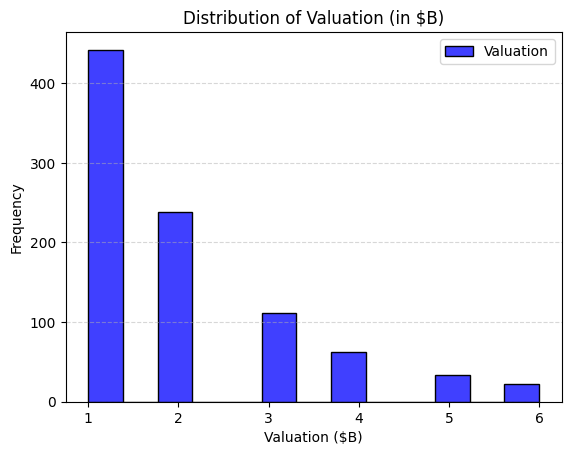

In [28]:
sns.histplot(companies['Valuation'], color='blue', label='Valuation')
plt.title('Distribution of Valuation (in $B)')
plt.xlabel('Valuation ($B)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)

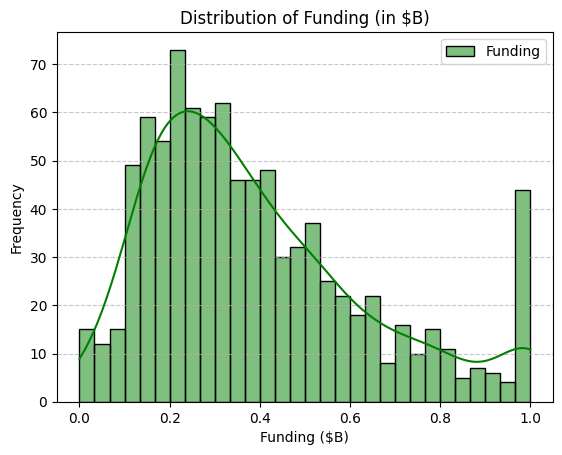

In [29]:
sns.histplot(companies['Funding'], bins=30, kde=True, color='green', label='Funding')
plt.title('Distribution of Funding (in $B)')
plt.xlabel('Funding ($B)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

### Industry Analytics

<ipython-input-30-b19919158286>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=industry_counts.index, x=industry_counts.values, palette='tab10')


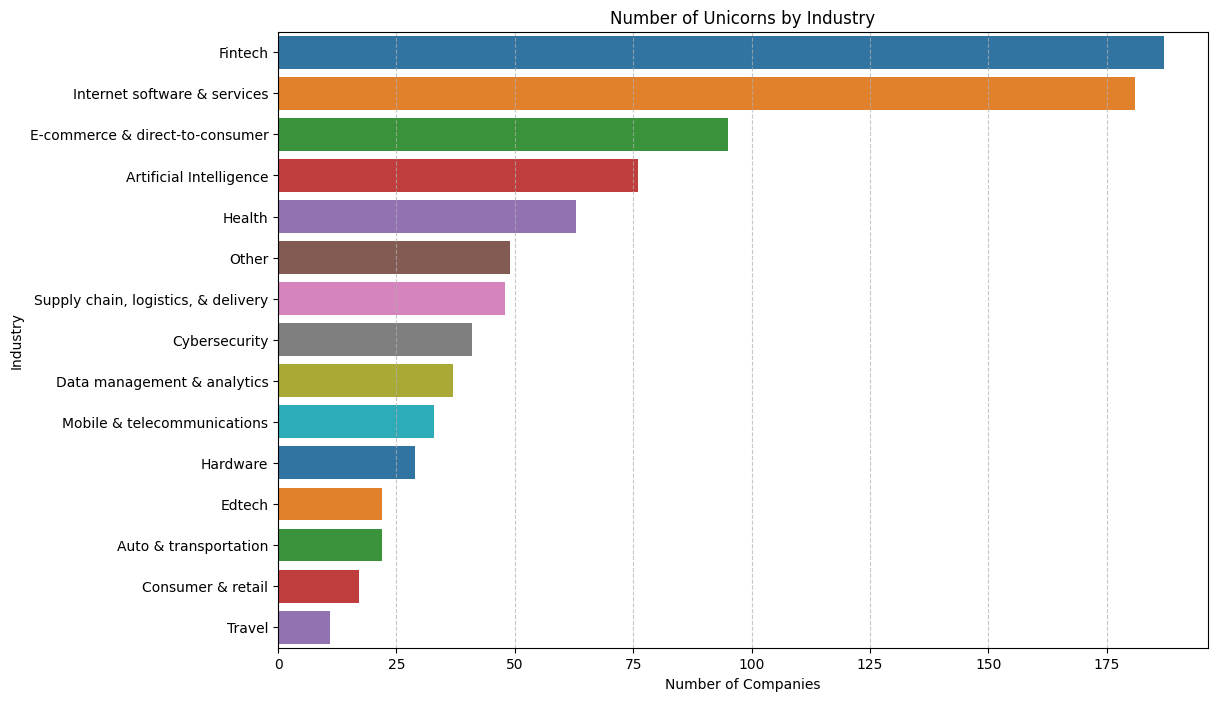

In [30]:
industry_counts = companies['Industry'].value_counts()
plt.figure(figsize=(12, 8))
sns.barplot(y=industry_counts.index, x=industry_counts.values, palette='tab10')
plt.title('Number of Unicorns by Industry')
plt.xlabel('Number of Companies')
plt.ylabel('Industry')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

<ipython-input-31-978c4324c4cb>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=industry_counts.index, x=industry_counts.values, palette='tab10')


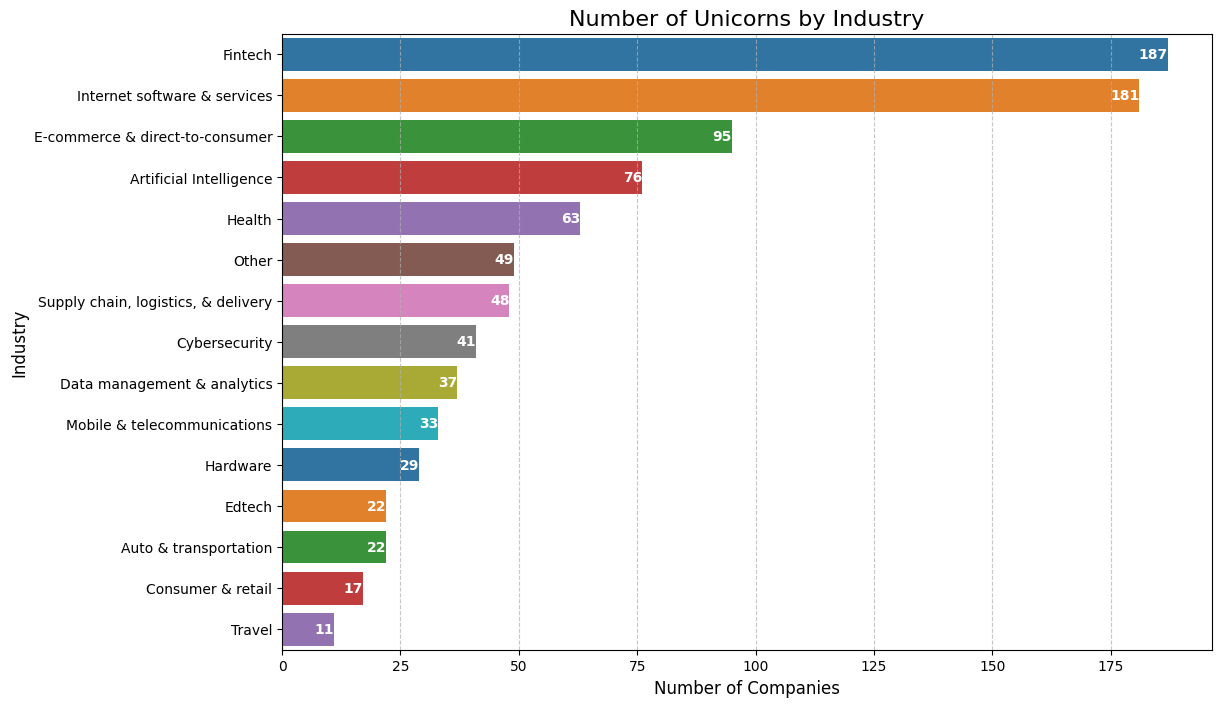

In [31]:
industry_counts = companies['Industry'].value_counts()

plt.figure(figsize=(12, 8))
sns.barplot(y=industry_counts.index, x=industry_counts.values, palette='tab10')

for index, value in enumerate(industry_counts.values):
    plt.text(value, index, str(value), va='center', ha = 'right', color = 'white', fontweight='bold')

plt.title('Number of Unicorns by Industry', fontsize=16)
plt.xlabel('Number of Companies', fontsize=12)
plt.ylabel('Industry', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

### Geographic Analysis:

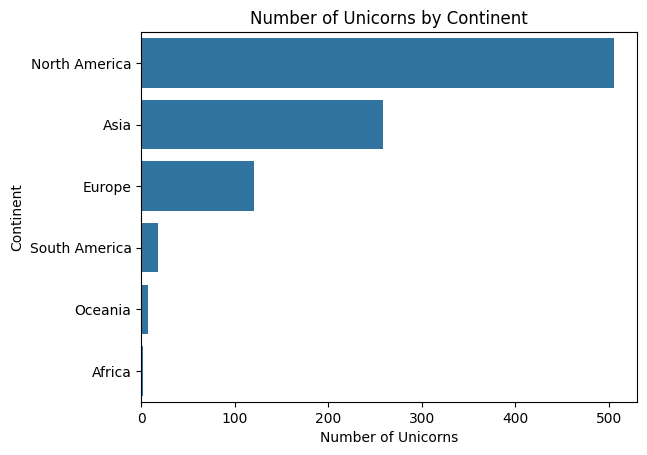

In [32]:
continent_counts = companies['Continent'].value_counts()

sns.barplot(y = continent_counts.index, x = continent_counts.values)
plt.title('Number of Unicorns by Continent')
plt.xlabel('Number of Unicorns')
plt.ylabel('Continent')
plt.show()

<ipython-input-34-450a5fa803f9>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=continent_counts.index, x=continent_counts.values, palette='tab10')


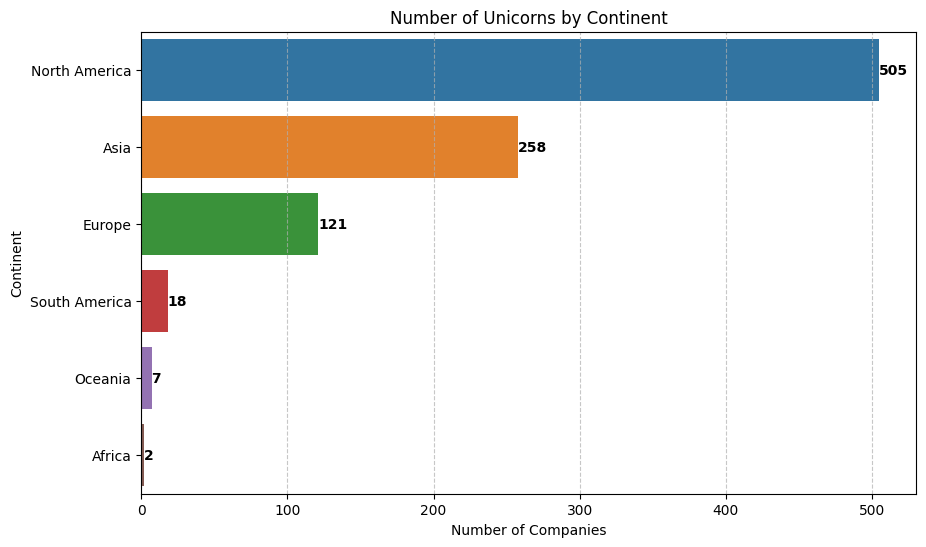

In [34]:
continent_counts = companies['Continent'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(y=continent_counts.index, x=continent_counts.values, palette='tab10')

for index, value in enumerate(continent_counts.values):
    plt.text(value, index, str(value), va='center', fontweight='bold', ha = 'left', color = 'black')

plt.title('Number of Unicorns by Continent')
plt.xlabel('Number of Companies')
plt.ylabel('Continent')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

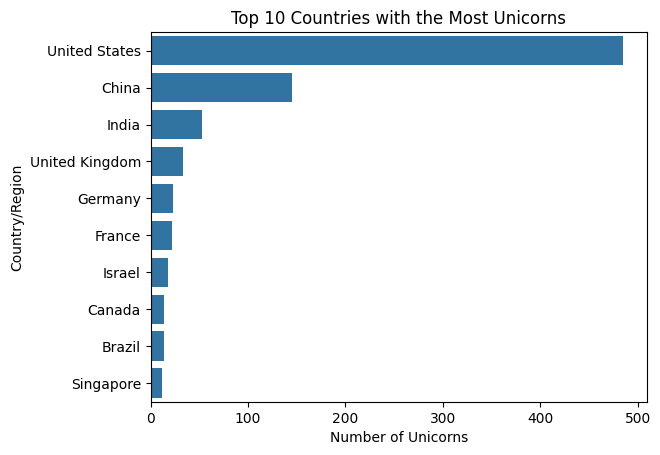

In [35]:
country_count = companies['Country/Region'].value_counts().head(10)

sns.barplot(y = country_count.index, x = country_count.values)
plt.title('Top 10 Countries with the Most Unicorns')
plt.xlabel('Number of Unicorns')
plt.ylabel('Country/Region')
plt.show()

<ipython-input-36-f6fdf9255ee9>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=country_counts.index, x=country_counts.values, palette='tab10')


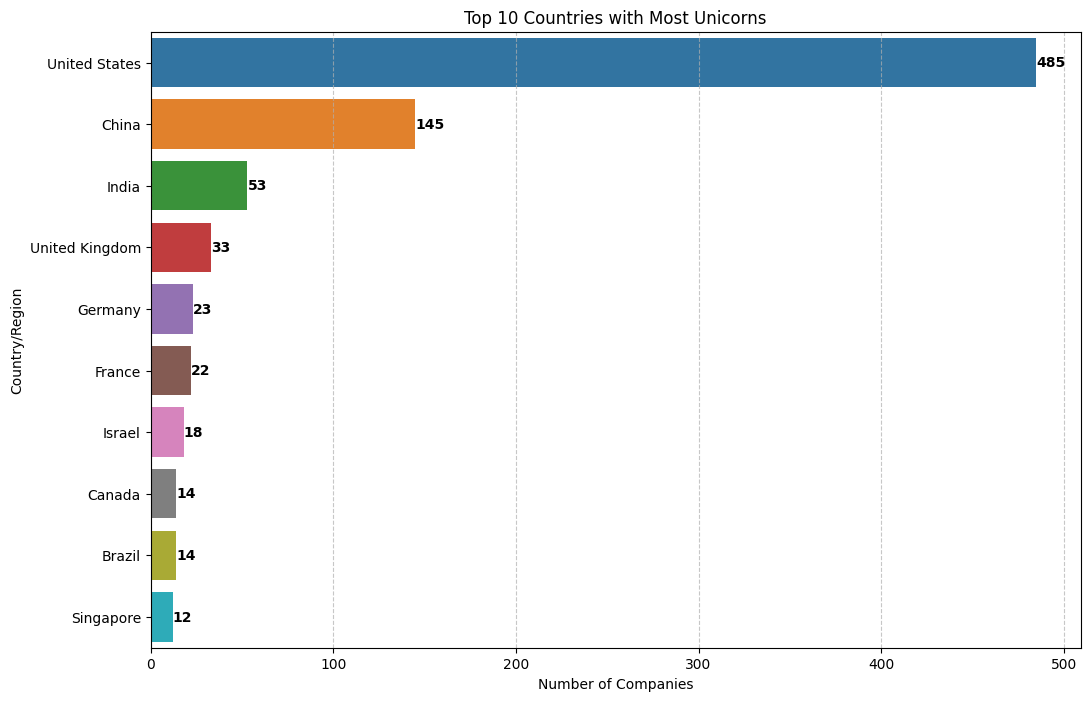

In [36]:
country_counts = companies['Country/Region'].value_counts().head(10)

plt.figure(figsize=(12, 8))
sns.barplot(y=country_counts.index, x=country_counts.values, palette='tab10')

for index, value in enumerate(country_counts.values):
    plt.text(value, index, str(value), va='center', fontweight='bold')

plt.title('Top 10 Countries with Most Unicorns')
plt.xlabel('Number of Companies')
plt.ylabel('Country/Region')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

### Temporal Analysis:

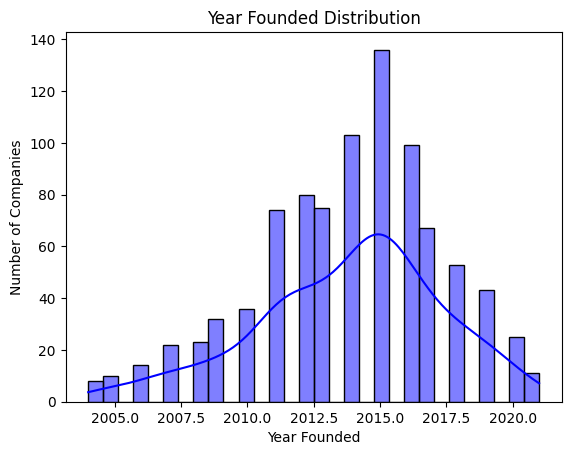

In [37]:
sns.histplot(companies['Year Founded'], bins = 30, kde = True, color = 'blue')
plt.title('Year Founded Distribution')
plt.xlabel('Year Founded')
plt.ylabel('Number of Companies')
plt.show()

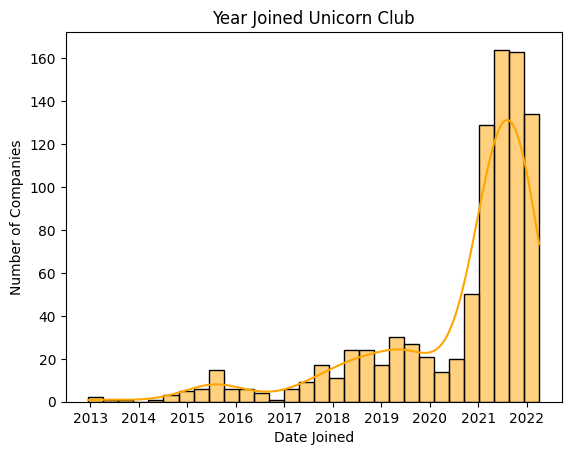

In [38]:
sns.histplot(companies['Date Joined'], bins = 30, kde = True, color = 'orange')
plt.title('Year Joined Unicorn Club')
plt.xlabel('Date Joined')
plt.ylabel('Number of Companies')
plt.show()

### Investors Analysis

In [39]:
investors = companies['Select Investors'].dropna().str.split(', ').sum()
investors_count = Counter(investors).most_common(10)
investors_count

[('Accel', 51),
 ('Andreessen Horowitz', 43),
 ('Insight Partners', 43),
 ('Tiger Global Management', 43),
 ('Sequoia Capital China', 36),
 ('Sequoia Capital', 35),
 ('Lightspeed Venture Partners', 30),
 ('General Catalyst', 29),
 ('Index Ventures', 27),
 ('SoftBank Group', 26)]

<ipython-input-40-ed4a69751dc2>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = list(investors_frequencies), y=list(investors_name), palette = 'tab10')


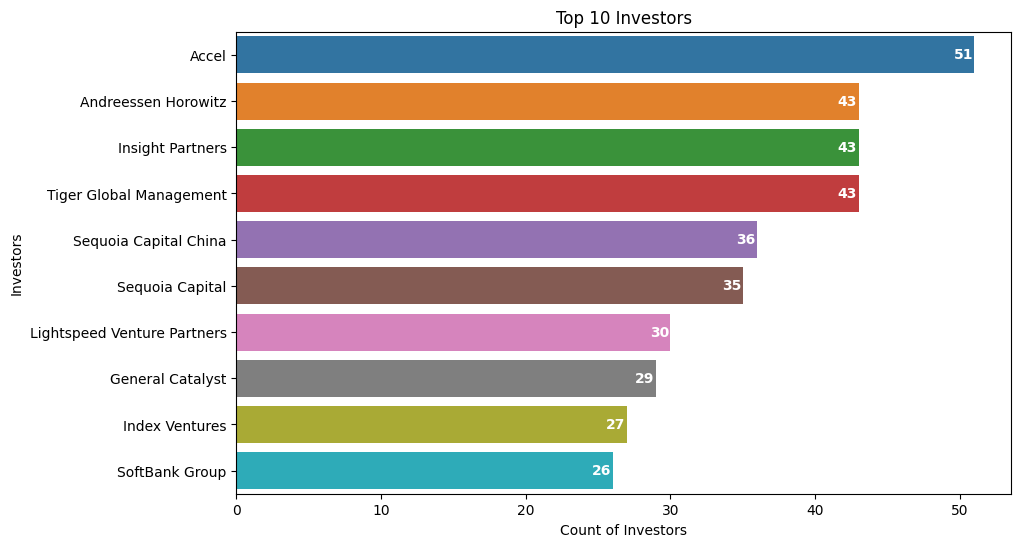

In [40]:
investors_name, investors_frequencies =zip(*investors_count)

plt.figure(figsize=(10, 6))

sns.barplot(x = list(investors_frequencies), y=list(investors_name), palette = 'tab10')

for index, value in enumerate(investors_frequencies):
    plt.text(value - 0.1, index, str(value), va='center', fontweight='bold', fontsize=10, color='white', ha = 'right')

plt.title('Top 10 Investors')
plt.xlabel('Count of Investors')
plt.ylabel('Investors')
plt.show()

<ipython-input-41-1f9c0a0ef2c1>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = companies, x = 'Funding', y = 'Industry', palette = 'Set3')


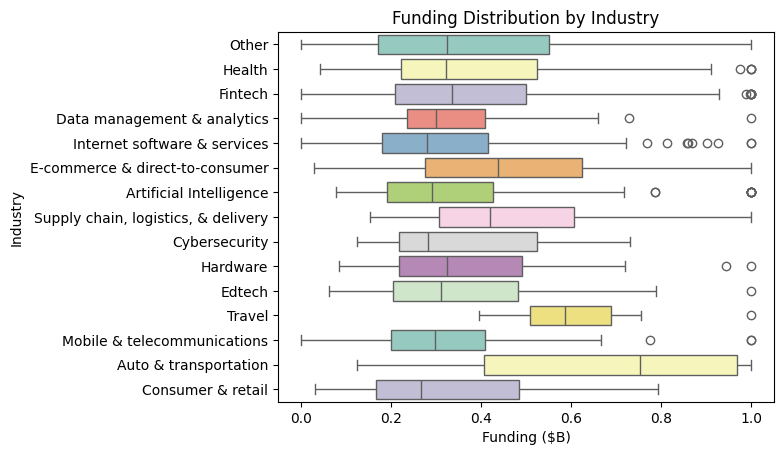

In [41]:
sns.boxplot(data = companies, x = 'Funding', y = 'Industry', palette = 'Set3')
plt.title('Funding Distribution by Industry')
plt.xlabel('Funding ($B)')
plt.ylabel('Industry')
plt.show()

<ipython-input-42-6f892b028985>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=companies, x='Funding', y='Industry', palette='Set3')


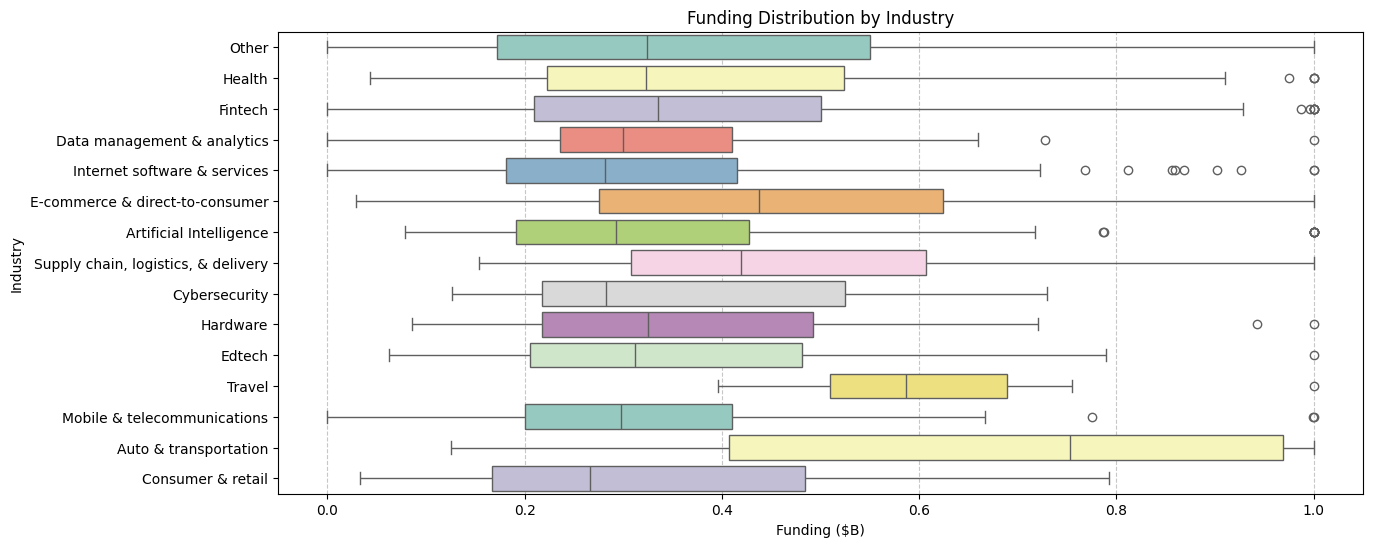

In [42]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=companies, x='Funding', y='Industry', palette='Set3')
plt.title('Funding Distribution by Industry')
plt.xlabel('Funding ($B)')
plt.ylabel('Industry')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [43]:
numerics = companies[['Valuation', 'Funding', 'Year Founded', 'Years to Join']].dropna()
corr = numerics.corr()

sns.heatmap(corr, annot = True, cmap = 'coolwarm', fmt = " .2f")
plt.title('Correlation Heatmap')
plt.show()

KeyError: "['Years to Join'] not in index"

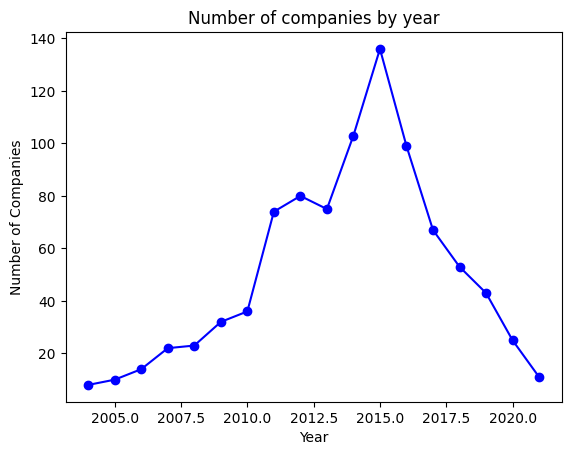

In [44]:
year_founded_count = companies['Year Founded'].value_counts().sort_index()
plt.plot(year_founded_count.index, year_founded_count.values, marker = 'o', color = 'blue')
plt.title('Number of companies by year')
plt.xlabel('Year')
plt.ylabel('Number of Companies')
plt.show()

In [45]:
numerical_data = companies[['Valuation', 'Funding', 'Year Founded', 'Years to Join']].dropna()
correlation_matrix = numerical_data.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Heatmap')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

KeyError: "['Years to Join'] not in index"

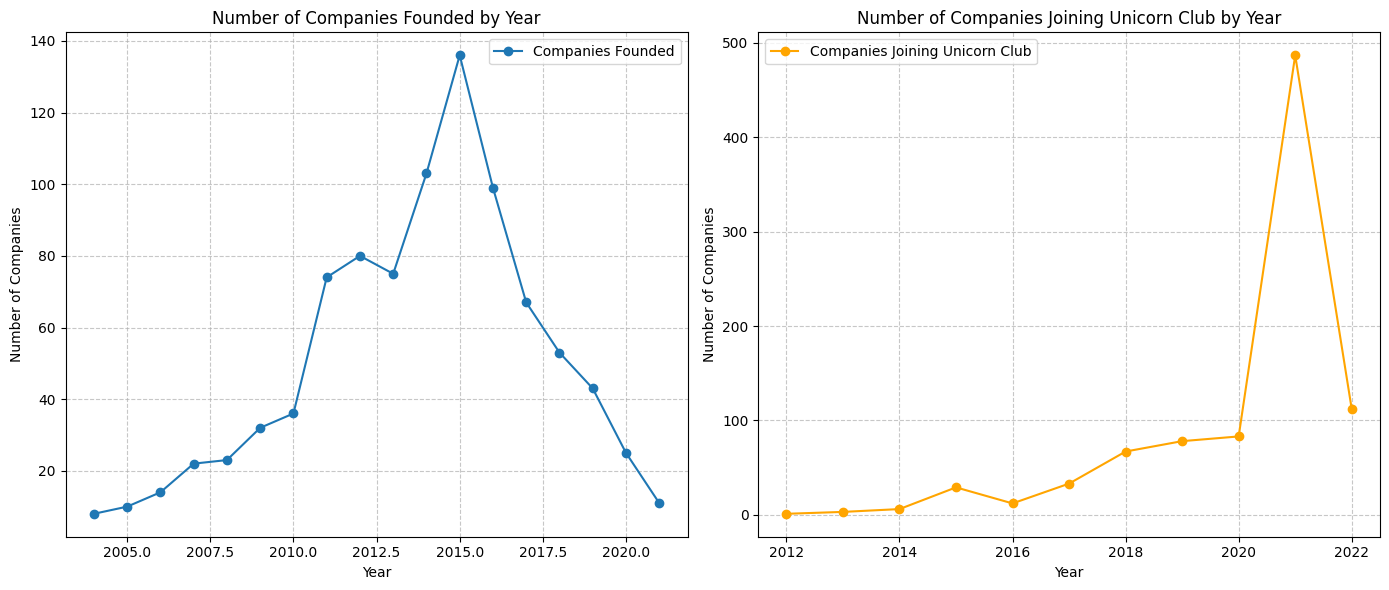

In [46]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
year_founded_count = companies['Year Founded'].value_counts().sort_index()
plt.plot(year_founded_count.index, year_founded_count.values, marker='o', label='Companies Founded')
plt.title('Number of Companies Founded by Year')
plt.xlabel('Year')
plt.ylabel('Number of Companies')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()


plt.subplot(1, 2, 2)
year_joined_count = companies['Date Joined'].dt.year.value_counts().sort_index()
plt.plot(year_joined_count.index, year_joined_count.values, marker='o', color='orange', label='Companies Joining Unicorn Club')
plt.title('Number of Companies Joining Unicorn Club by Year')
plt.xlabel('Year')
plt.ylabel('Number of Companies')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

plt.tight_layout()
plt.show()

<ipython-input-47-4f6c0ccbdbec>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = top_10_valuation, x = 'Valuation', y = 'Company', palette = 'Spectral')


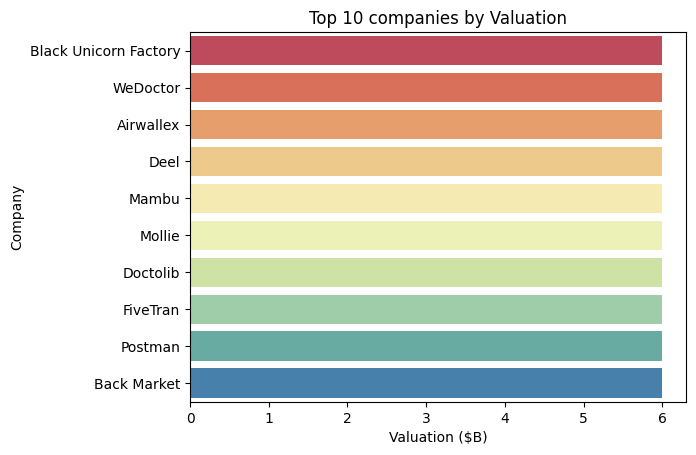

In [47]:
top_10_valuation = companies.nlargest(10, 'Valuation')[['Company', 'Valuation']]
sns.barplot(data = top_10_valuation, x = 'Valuation', y = 'Company', palette = 'Spectral')
plt.title('Top 10 companies by Valuation')
plt.xlabel('Valuation ($B)')
plt.ylabel('Company')
plt.show()

<ipython-input-48-ecfd9294412c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_valuation, x='Valuation', y='Company', palette='Spectral')


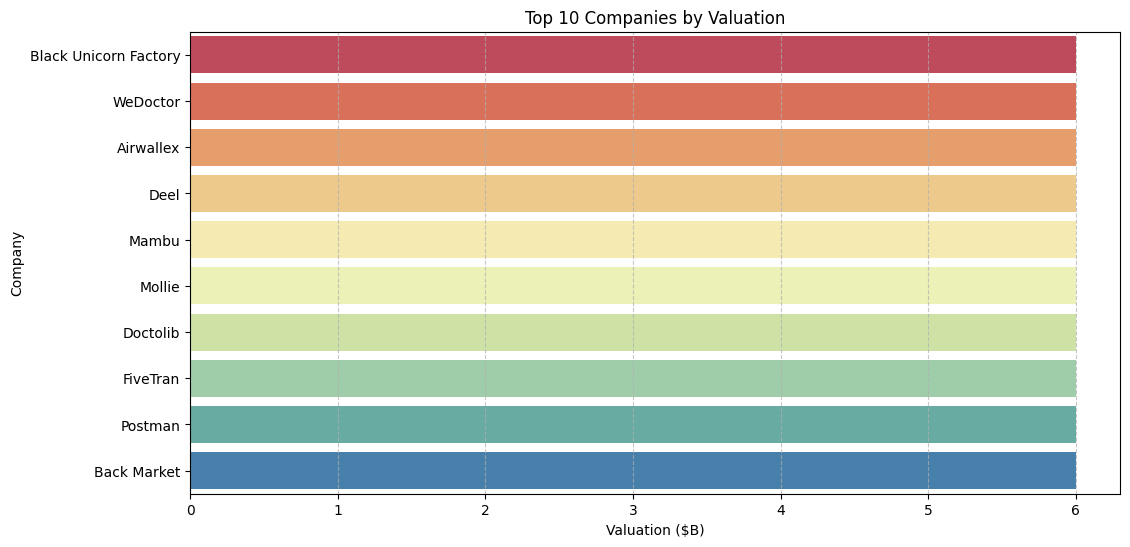

In [48]:
top_10_valuation = companies.nlargest(10, 'Valuation')[['Company', 'Valuation']]

plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_valuation, x='Valuation', y='Company', palette='Spectral')
plt.title('Top 10 Companies by Valuation')
plt.xlabel('Valuation ($B)')
plt.ylabel('Company')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

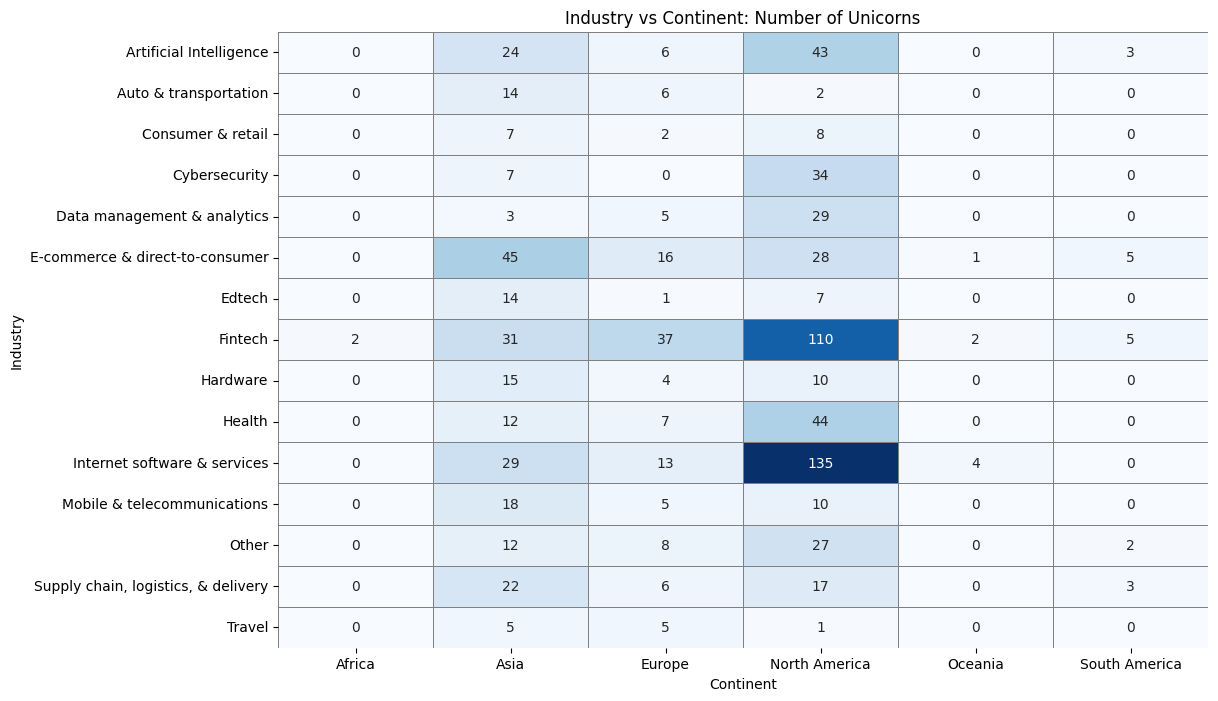

In [49]:
industry_continent_matrix = companies.groupby(['Industry', 'Continent']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(industry_continent_matrix, cmap='Blues', annot=True, fmt="d", cbar=False, linewidths=0.5, linecolor='gray')
plt.title('Industry vs Continent: Number of Unicorns')
plt.xlabel('Continent')
plt.ylabel('Industry')
plt.show()

## **Step 7: Feature Engineering**

In [50]:
companies['Years to Join'] = companies['Date Joined'].dt.year - companies['Year Founded']

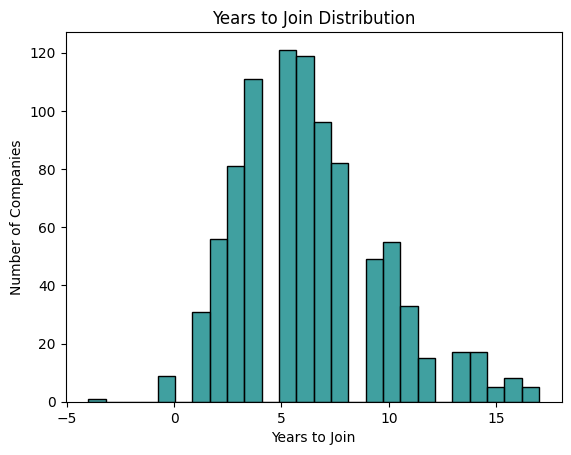

In [ ]:
sns.histplot(companies['Years to Join'], color = 'teal')
plt.title('Years to Join Distribution')
plt.xlabel('Years to Join')
plt.ylabel('Number of Companies')
plt.show()

# **Bivariate Analysis**

## Valuation vs. Funding

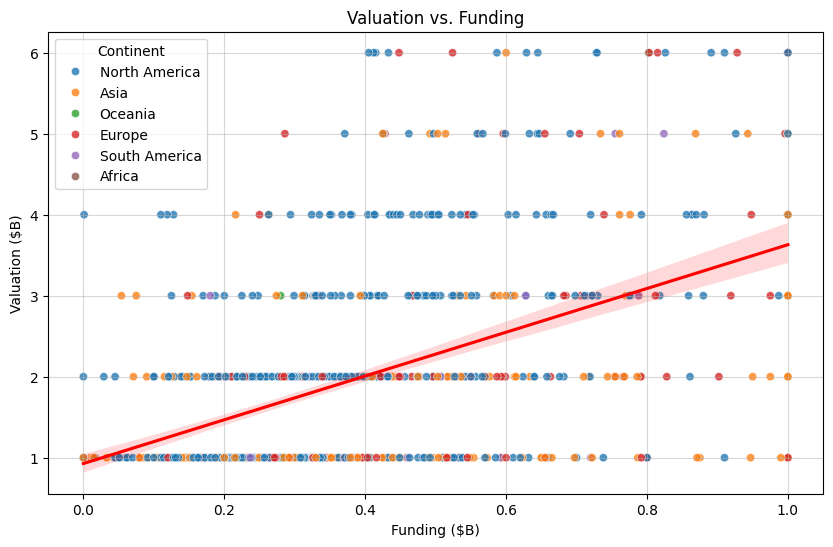

In [51]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=companies, x='Funding', y='Valuation', hue = 'Continent',  palette='tab10', alpha=0.8)
sns.regplot(data=companies, x='Funding', y='Valuation', scatter=False, color='red', line_kws={"label": "Trendline"})
plt.title('Valuation vs. Funding')
plt.xlabel('Funding ($B)')
plt.ylabel('Valuation ($B)')
plt.legend(title='Continent')
plt.grid(alpha=0.5)
plt.show()

#hue='Continent',

## Time to Unicorn vs. Valuation

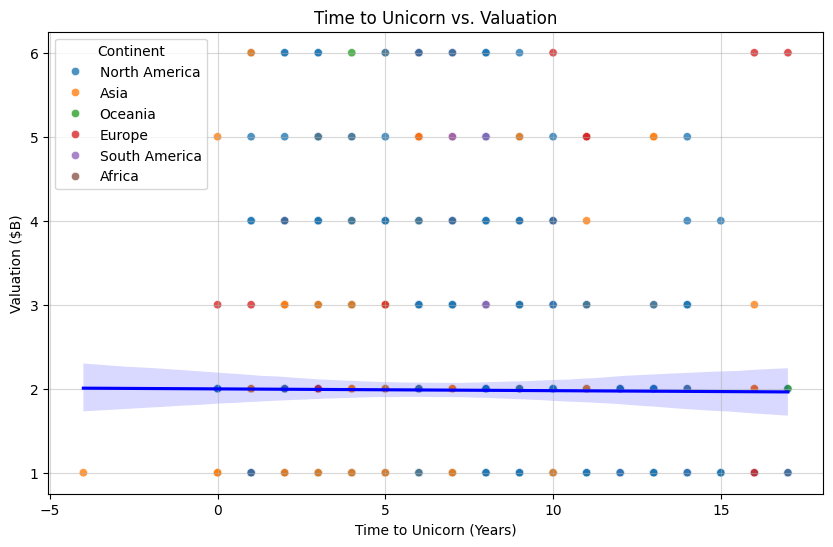

In [52]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=companies, x='Years to Join', y='Valuation', hue='Continent', palette='tab10', alpha=0.8)
sns.regplot(data=companies, x='Years to Join', y='Valuation', scatter=False, color='blue', line_kws={"label": "Trendline"})
plt.title('Time to Unicorn vs. Valuation')
plt.xlabel('Time to Unicorn (Years)')
plt.ylabel('Valuation ($B)')
plt.legend(title='Continent')
plt.grid(alpha=0.5)
plt.show()

## Valuation by Continent

<ipython-input-53-4a1e4073252b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=companies, x='Continent', y='Valuation', palette='Set2')


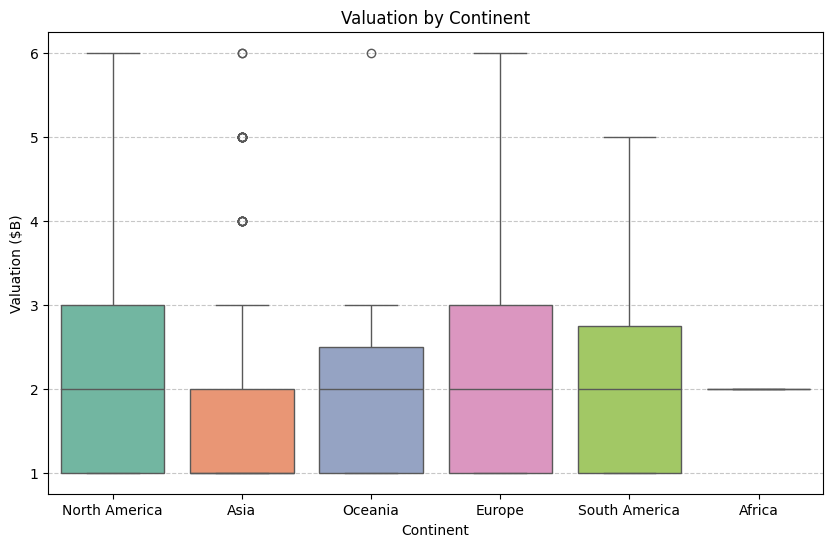

In [53]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=companies, x='Continent', y='Valuation', palette='Set2')
plt.title('Valuation by Continent')
plt.xlabel('Continent')
plt.ylabel('Valuation ($B)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Funding by Industry

<ipython-input-54-af995c04887d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=companies, x='Funding', y='Industry', palette='coolwarm')


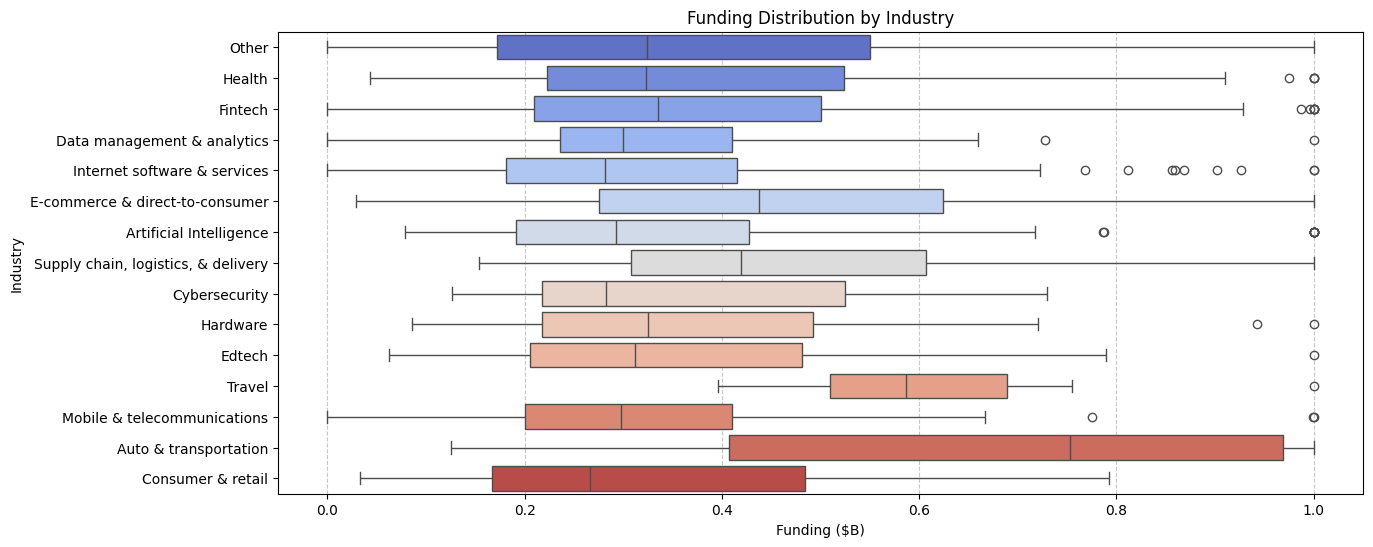

In [54]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=companies, x='Funding', y='Industry', palette='coolwarm')
plt.title('Funding Distribution by Industry')
plt.xlabel('Funding ($B)')
plt.ylabel('Industry')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# **Multivariate Analysis**

## Valuation, Funding, and Industry

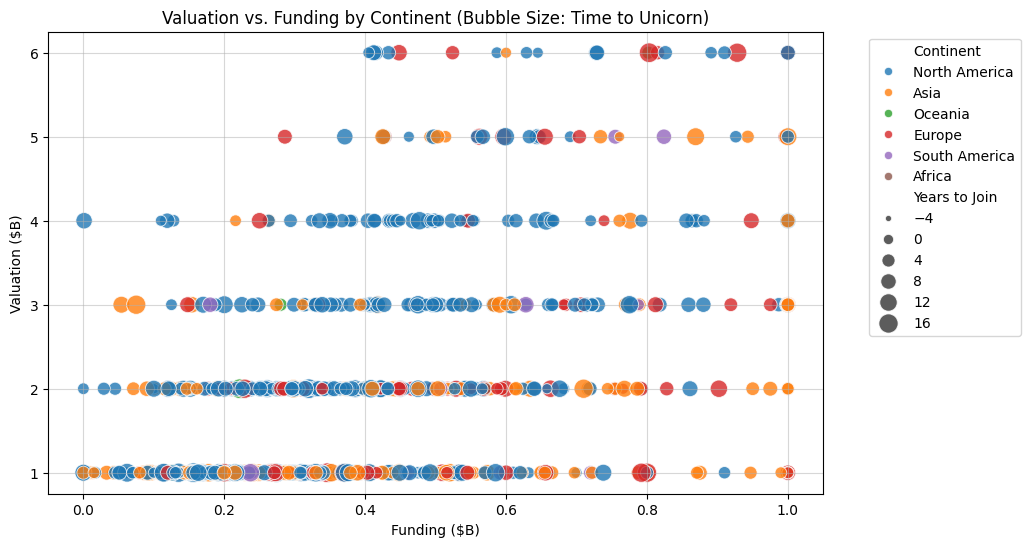

In [55]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=companies,
    x='Funding',
    y='Valuation',
    hue='Continent',
    size='Years to Join',
    palette='tab10',
    alpha=0.8,
    sizes=(20, 200)
)
plt.title('Valuation vs. Funding by Continent (Bubble Size: Time to Unicorn)')
plt.xlabel('Funding ($B)')
plt.ylabel('Valuation ($B)')
plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.5)
plt.show()

## Expanded Correlation Matrix

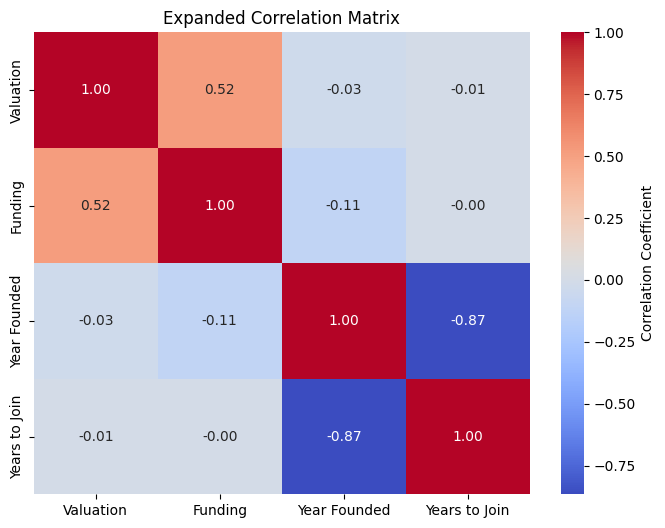

In [56]:
expanded_corr = companies[['Valuation', 'Funding', 'Year Founded', 'Years to Join']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(expanded_corr, annot=True, cmap='coolwarm', fmt=".2f", cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Expanded Correlation Matrix')
plt.show()

## FacetGrid: Valuation and Funding across Continents and Industries

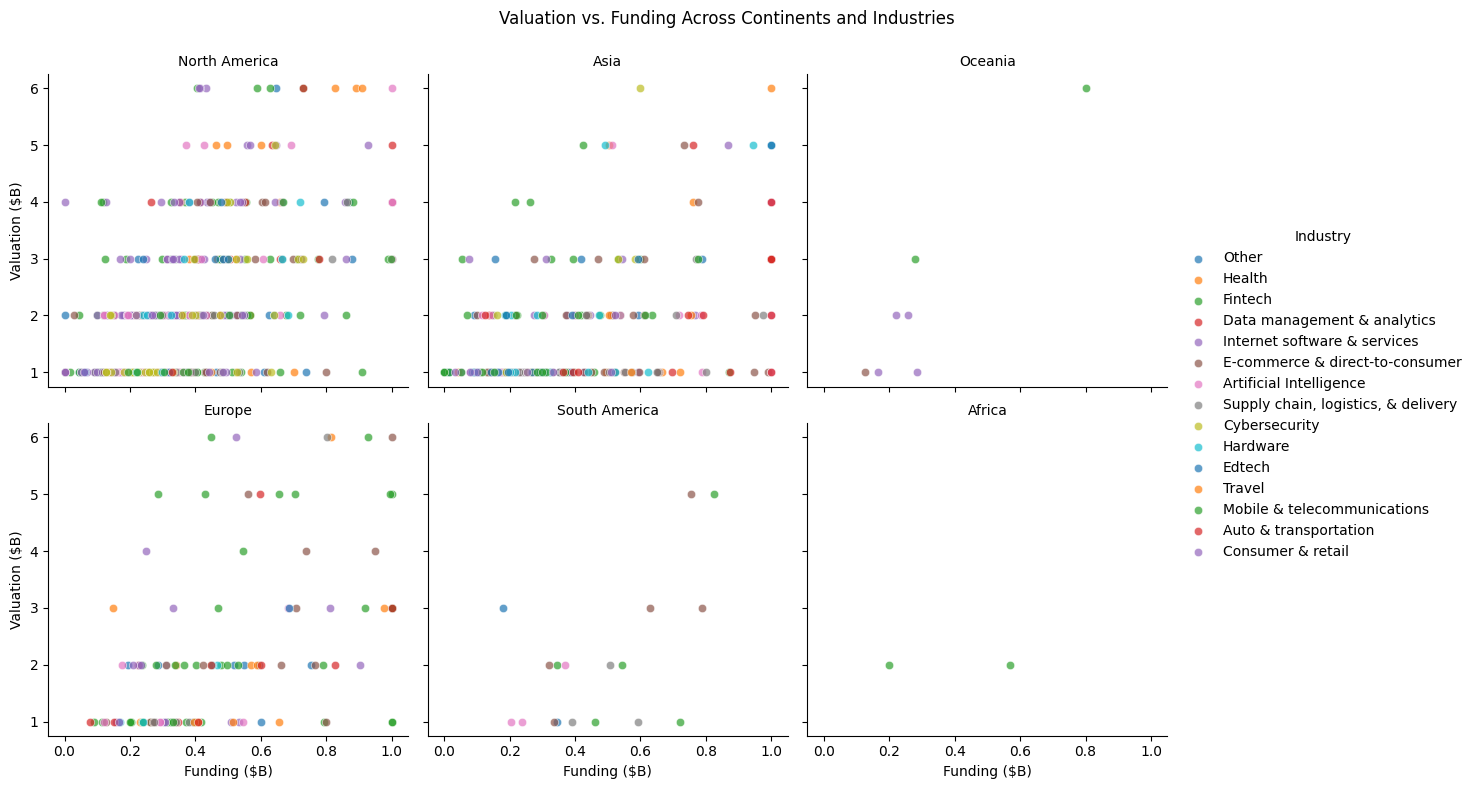

In [57]:
g = sns.FacetGrid(companies, col='Continent', hue='Industry', col_wrap=3, height=4, palette='tab10')
g.map(sns.scatterplot, 'Funding', 'Valuation', alpha=0.7)
g.add_legend()
g.set_titles('{col_name}')
g.set_axis_labels('Funding ($B)', 'Valuation ($B)')
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Valuation vs. Funding Across Continents and Industries')
plt.show()